In [1]:
import pandas as pd
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load your dataset
data = pd.read_csv("C:\\Users\\leons\\Desktop\\MAHW3Leon\\telco.csv")

# Encode the 'churn' column
label_encoder = LabelEncoder()
data['churn_encoded'] = label_encoder.fit_transform(data['churn'])  # 1 for 'Yes', 0 for 'No'

# Select features
X = data[['tenure', 'age', 'address', 'income']]
y = data['churn_encoded']

# Add 'T' and 'E' columns for duration and event indicator
X = X.assign(T=data['tenure'], E=data['churn_encoded'])

# Initialize the AFT models
weibull_aft = WeibullAFTFitter()
log_normal_aft = LogNormalAFTFitter()
log_logistic_aft = LogLogisticAFTFitter()

# Fit the models
weibull_aft.fit(X, duration_col='T', event_col='E')
log_normal_aft.fit(X, duration_col='T', event_col='E')
log_logistic_aft.fit(X, duration_col='T', event_col='E')

# Print the summary of each model
print("Weibull AFT Model Summary:")
print(weibull_aft.summary)
print("\nLog-Normal AFT Model Summary:")
print(log_normal_aft.summary)
print("\nLog-Logistic AFT Model Summary:")
print(log_logistic_aft.summary)


Weibull AFT Model Summary:
                       coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                  
lambda_ address    0.002177   1.002179  0.003083       -0.003866   
        age        0.003548   1.003554  0.002069       -0.000507   
        income    -0.000149   0.999851  0.000222       -0.000585   
        tenure     0.054580   1.056097  0.001810        0.051033   
        Intercept  1.853403   6.381500  0.071702        1.712870   
rho_    Intercept  1.227983   3.414335  0.052537        1.125013   

                   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                             
lambda_ address          0.008219             0.996142             1.008253   
        age              0.007602             0.999493             1.007631   
        income           0.000287             0.999415             1.000287   
        tenure           0.058127

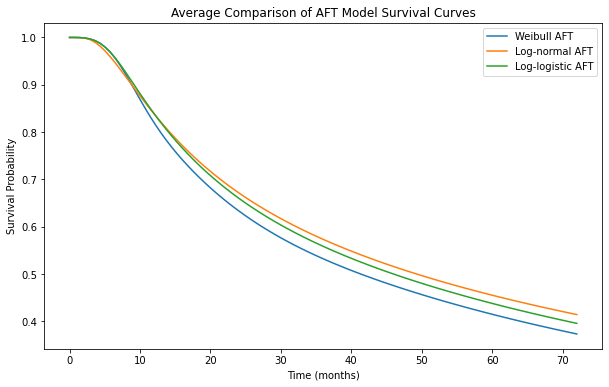

In [3]:
# Set up the plot
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

# Define a timeline for more detailed plotting
timeline = np.linspace(0, data['tenure'].max(), 100)  # 100 points from 0 to max tenure

# Plot average survival function for each model
for model, label in zip([weibull_aft, log_normal_aft, log_logistic_aft], ['Weibull AFT', 'Log-normal AFT', 'Log-logistic AFT']):
    survival_function = model.predict_survival_function(X, times=timeline)
    mean_survival = survival_function.mean(axis=1)  # Take mean across all predictions
    ax.plot(timeline, mean_survival, label=label)

plt.title('Average Comparison of AFT Model Survival Curves')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [4]:
# Assume 'model' is already fitted and 'X' contains the data of all customers
predicted_lifetimes = model.predict_median(X)
X['predicted_lifetime'] = predicted_lifetimes


In [5]:
# Assume an average monthly revenue per customer and the profit margin
average_revenue_per_month = 30  # example value
profit_margin = 0.25  # 25% profit margin

# Calculate CLV
X['CLV'] = X['predicted_lifetime'] * average_revenue_per_month * profit_margin


In [6]:
# Assuming you choose 'region' as the segment column
X['segment'] = data['region']  # Replace 'region' with the actual column name you choose

# Calculate average CLV per segment
average_clv_per_segment = X.groupby('segment')['CLV'].mean()

print(average_clv_per_segment)


segment
Zone 1    694.579734
Zone 2    670.514933
Zone 3    741.956752
Name: CLV, dtype: float64
